# Weekend Movie Trip

__Dataset Summary__ -
MovieLens-100K Dataset describes ratings given by various users to various movies from MovieLens, a movie recommendation service. It contains 100,000 ratings from 1000 users on 1700 movies. The dataset was released on 4/1998.
<br>
<br>
Users were selected at random for inclusion. All selected users had rated at least 1 movies. Each user is represented by an id, age, sex, occupation and zipcode. The data are contained in the files u.data(ratings information), u.user(user information), u.item(movies information).
<br>
<br>
This dataset can be downloaded at https://grouplens.org/datasets/movielens/100k/.


In this notebook, I have used K-Neighbours classifier approach to recommend similar interest movies to the users.

References:
<br>
https://www.kaggle.com/skillsmuggler/what-do-you-recommend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
ratings = pd.read_csv('../data/external/ml-100k/u.data', encoding='latin-1', low_memory=False)
ratings.head()

,196 242 3 881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [3]:
ratings = pd.read_csv('../data/external/ml-100k/u.data', sep='\t',  encoding='latin-1', low_memory=False)
ratings.head()


,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [4]:
ratings.columns = ['user_id', 'movie_id', 'rating', 'time']
ratings.head()


,user_id,movie_id,rating,time
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [5]:
movies_cols = ['movie_id', 'movie_title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('../data/external/ml-100k/u.item', sep='|',  
                    encoding='latin-1', low_memory=False, names = movies_cols)
movies.head(3)

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Mean rating for each Movie

movie_rating = ratings.groupby('movie_id')['rating'].mean()
movie_rating.head()

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

In [7]:
# Count of the number of ratings per Movie

movie_rating_count = ratings.groupby('movie_id')['rating'].count()
movie_rating_count.head()

movie_id
1    452
2    131
3     90
4    209
5     86
Name: rating, dtype: int64

In [8]:
# Un-Reliability factor

unreliability = ratings.groupby('movie_id')['rating'].std(ddof = -1)
unreliability.head()

movie_id
1    0.925846
2    0.959147
3    1.199359
4    0.960462
5    0.935504
Name: rating, dtype: float64

In [9]:
# Data frame with calculated fields and measures

unique_products_list = ratings.movie_id.unique()
data_model = pd.DataFrame({'Rating': movie_rating[unique_products_list],\
                           'Count': movie_rating_count[unique_products_list], \
                          'Unreliability': unreliability[unique_products_list]})
data_model.head()

,Rating,Count,Unreliability
movie_id,,,
302,4.161616,297,0.851848
377,2.153846,13,0.988950
51,3.456790,81,1.148163
346,3.642857,126,1.075601
474,4.252577,194,0.849204


In [10]:
print("Data model shape (number of data points): %s" % str(data_model.shape))

Data model shape (number of data points): (1682, 3)


In [11]:
def normalize(values):
    mn = values.min()
    mx = values.max()
    return(10.0/(mx - mn) * (values - mx)+10)

In [12]:
data_model_norm = normalize(data_model)
data_model_norm.head()

,Rating,Count,Unreliability
movie_id,,,
302,7.904040,5.085911,4.761977
377,2.884615,0.206186,5.528398
51,6.141975,1.374570,6.418425
346,6.607143,2.147766,6.012793
474,8.131443,3.316151,4.747194


In [13]:
# Setting up the model

# Recommend 20 similar items
engine = KNeighborsClassifier(n_neighbors=20)

# Training data points
data_points = data_model_norm[['Count', 'Rating', 'Unreliability']].values

#Training labels
labels = data_model_norm.index.values

print("Data points: ")
print(data_points)
print("Labels: ")
print(labels)

engine.fit(data_points, labels)

Data points: 
[[5.08591065 7.9040404  4.7619774 ]
 [0.20618557 2.88461538 5.52839821]
 [1.37457045 6.14197531 6.41842472]
 ...
 [0.         5.         0.        ]
 [0.         5.         0.        ]
 [0.         5.         0.        ]]
Labels: 
[ 302  377   51 ... 1637 1630 1641]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

Recommended Movies: 
[Int64Index([  1, 300, 181, 258,   7, 174, 127, 100, 237, 117, 286,  98, 288,
            121, 222,  56, 172, 204, 313, 210],
           dtype='int64', name='movie_id')]


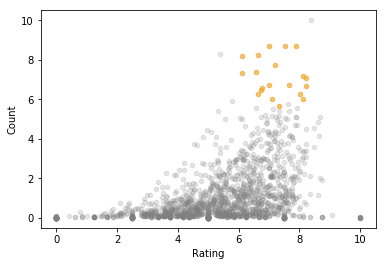

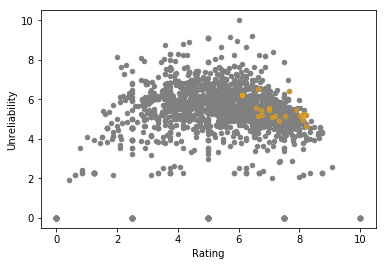

In [14]:
# Enter Movie ID to get a list of 20 recommended movies

# User entered value
movie_id = 1 #Toy Story (1995)
movie_data = [data_model_norm.loc[movie_id][['Count', 'Rating', 'Unreliability']].values]

recommended_movies = engine.kneighbors(X=movie_data, n_neighbors=20, return_distance=False)

# List of movie IDs form the indexes

movies_list = []

for each in recommended_movies:
    movies_list.append(data_model_norm.iloc[each].index)

print("Recommended Movies: ")
print(movies_list)

# Showing recommended movies

ax = data_model_norm.plot(kind='scatter', x='Rating', y='Count', color='grey', alpha=0.20)
data_model_norm.iloc[recommended_movies[0]].plot(kind='scatter', x='Rating', y='Count',\
                                                   color='orange', alpha=0.5, ax=ax)

ax2 = data_model_norm.plot(kind='scatter', x='Rating', y='Unreliability', color='grey')
data_model_norm.iloc[recommended_movies[0]].plot(kind='scatter', x='Rating', y='Unreliability',\
                                                   color='orange', alpha=0.5, ax=ax2)
plt.show()


In [15]:
#List of Recommended movies
movies.loc[movies.index.isin([1, 300, 181, 258, 7, 174, 127, 100, 237, 117, 286,  98, 288,
            121, 222,  56, 172, 204, 313, 210])]

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
56,57,Priest (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Priest%20(1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,99,Snow White and the Seven Dwarfs (1937),01-Jan-1937,NaN,http://us.imdb.com/M/title-exact?Snow%20White%...,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
100,101,Heavy Metal (1981),08-Mar-1981,NaN,http://us.imdb.com/M/title-exact?Heavy%20Metal...,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
117,118,Twister (1996),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Twister%20(1996),0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
121,122,"Cable Guy, The (1996)",14-Jun-1996,NaN,"http://us.imdb.com/M/title-exact?Cable%20Guy,%...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,128,Supercop (1992),26-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Police%20Stor...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
172,173,"Princess Bride, The (1987)",01-Jan-1987,NaN,http://us.imdb.com/M/title-exact?Princess%20Br...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
174,175,Brazil (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Brazil%20(1985),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


It was observed that only a few movies are common between KNeighbours and Cosine Similarity approach, though Cosine Similarity actually gives much meaningful recommendations according to ratings and genres as compared to this approach.